In [1]:
#Nama Lengkap : Teja Kusuma 
#Dikerjakan pada tanggal : 19 Oktober 2020 


import itertools
import os

import matplotlib.pylab as plt
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.0
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is available


In [16]:
DATASET_PATH = '/content/drive/My Drive/my_data/rps-cv-images'
IMG_WIDTH = 300
IMG_HEIGHT = 200
BATCH_SIZE = 8
EPOCHS = 50

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode ='categorical',
    subset='training',
)

validation_generator = train_datagen.flow_from_directory(
    DATASET_PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode ='categorical',
    subset='validation',
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [24]:
history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // BATCH_SIZE,  
            epochs=EPOCHS, 
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // BATCH_SIZE,  
            verbose=1
          )

Epoch 1/50
164/164 [==============================] - 91s 555ms/step - loss: 0.6481 - accuracy: 0.7274 - val_loss: 0.3283 - val_accuracy: 0.8876
Epoch 2/50
164/164 [==============================] - 35s 213ms/step - loss: 0.2785 - accuracy: 0.9043 - val_loss: 0.1968 - val_accuracy: 0.9450
Epoch 3/50
164/164 [==============================] - 35s 212ms/step - loss: 0.2188 - accuracy: 0.9219 - val_loss: 0.2164 - val_accuracy: 0.9369
Epoch 4/50
164/164 [==============================] - 35s 211ms/step - loss: 0.1925 - accuracy: 0.9319 - val_loss: 0.1406 - val_accuracy: 0.9553
Epoch 5/50
164/164 [==============================] - 34s 208ms/step - loss: 0.1218 - accuracy: 0.9556 - val_loss: 0.1901 - val_accuracy: 0.9358
Epoch 6/50
164/164 [==============================] - 35s 211ms/step - loss: 0.1251 - accuracy: 0.9533 - val_loss: 0.1406 - val_accuracy: 0.9667
Epoch 7/50
164/164 [==============================] - 34s 206ms/step - loss: 0.1617 - accuracy: 0.9510 - val_loss: 0.4003 - val_ac

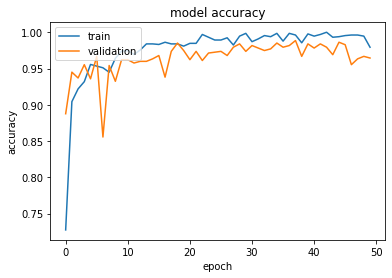

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

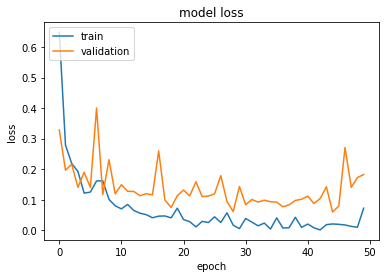

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [55]:
score = model.evaluate(validation_generator, batch_size=1)
print("Validation Loss :", score[0])
print("Validation Accuracy :", score[1])

110/110 [==============================] - 14s 123ms/step - loss: 0.1512 - accuracy: 0.9691
Validation Loss : 0.15123894810676575
Validation Accuracy : 0.9691075682640076


Saving 1Io5Ksm3bqy87EAU.png to 1Io5Ksm3bqy87EAU.png

1Io5Ksm3bqy87EAU.png 

Scissors


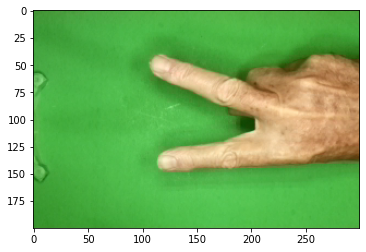

In [54]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for i in uploaded.keys():
  filename = i

path = os.path.join("/content", filename)
img = image.load_img(path, target_size=(IMG_HEIGHT ,IMG_WIDTH))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
kelas = np.argmax(classes)

print("\n"+filename, "\n")

if kelas == 0:
  print("Paper")
elif kelas == 1:
  print("Rock")
elif kelas == 2:
  print("Scissors")